In [147]:
def plot_year_genre(genres_analyze):
    for genre in genres_analyze:
        basics_genre = basics[basics["genres"] == genre]
        genre_year_counts = basics_genre.groupby('startYear').size().reset_index(name='counts')
    
        # Plotting
        plt.plot(genre_year_counts['startYear'], genre_year_counts['counts'], marker='o')
        plt.legend(genres_analyze)
    plt.show()

def plot_genre_rating(genres_analyze):
    for genre in genres_analyze:
        basics_genre = basics_ratings[basics_ratings["genres"] == genre]
       
        genre_year_average = basics_genre.groupby('startYear')['averageRating'].mean().reset_index(name='avg')
    
        plt.plot(genre_year_average['startYear'], genre_year_average['avg'], marker='o', label=genre)
        plt.legend(genres_analyze)
    plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #seaborn for plots


In [29]:
basics = pd.read_csv('title.basics.tsv', sep='\t', low_memory=False)

print('imported')

imported


In [30]:
basics = basics.replace('\\N', np.nan)
basics.startYear = basics.startYear.astype('float64')
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11174655 entries, 0 to 11174654
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         object 
 5   startYear       float64
 6   endYear         object 
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(1), object(8)
memory usage: 767.3+ MB


In [46]:
ratings = pd.read_csv('title.ratings.tsv', sep='\t')
print('ratings imported')

ratings imported


In [159]:
basics_ratings

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tconst,averageRating,numVotes
11632,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019.0,NaN,NaN,"Action,Crime",tt0026609,6.0,211.0
55747,tt0056840,short,Aufsätze,Aufsätze,0,2021.0,NaN,10,Short,tt0078149,5.4,22.0
56270,tt0057369,short,Number 14: Late Superimpositions,Number 14: Late Superimpositions,0,2023.0,NaN,30,Short,tt0078740,4.5,7127.0
59192,tt0060361,short,EMS nr 1,EMS nr 1,0,2016.0,NaN,14,Short,tt0082090,4.6,408.0
59197,tt0060366,short,A Embalagem de Vidro,A Embalagem de Vidro,0,2020.0,NaN,11,"Documentary,Short",tt0082095,7.1,718.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11174628,tt9916802,tvEpisode,Luc Janssens,Luc Janssens,0,2019.0,NaN,NaN,"Comedy,News,Talk-Show",NaN,NaN,NaN
11174632,tt9916810,tvEpisode,Danira Boukhriss Terkessidis,Danira Boukhriss Terkessidis,0,2019.0,NaN,NaN,"Comedy,News,Talk-Show",NaN,NaN,NaN
11174646,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014.0,NaN,11,"Adventure,Animation,Comedy",NaN,NaN,NaN
11174653,tt9916856,short,The Wind,The Wind,0,2015.0,NaN,27,Short,NaN,NaN,NaN


In [72]:
l = list(basics.genres[basics.genres.notnull()])
l_set = set()
for g in l:
    if(g=='NaN'):
        continue
    splitted_g = g.split(',')
    for g_spl in splitted_g:
        l_set.add(g_spl)

print(l_set)

{'Sport', 'Short', 'Reality-TV', 'Animation', 'Talk-Show', 'Game-Show', 'Action', 'Fantasy', 'Biography', 'News', 'Mystery', 'Adult', 'Western', 'History', 'Drama', 'Music', 'Horror', 'Adventure', 'Musical', 'Sci-Fi', 'Comedy', 'Documentary', 'War', 'Crime', 'Thriller', 'Romance', 'Family'}


In [47]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2096
1,tt0000002,5.6,283
2,tt0000003,6.5,2104
3,tt0000004,5.4,183
4,tt0000005,6.2,2840


<Figure size 800x800 with 0 Axes>

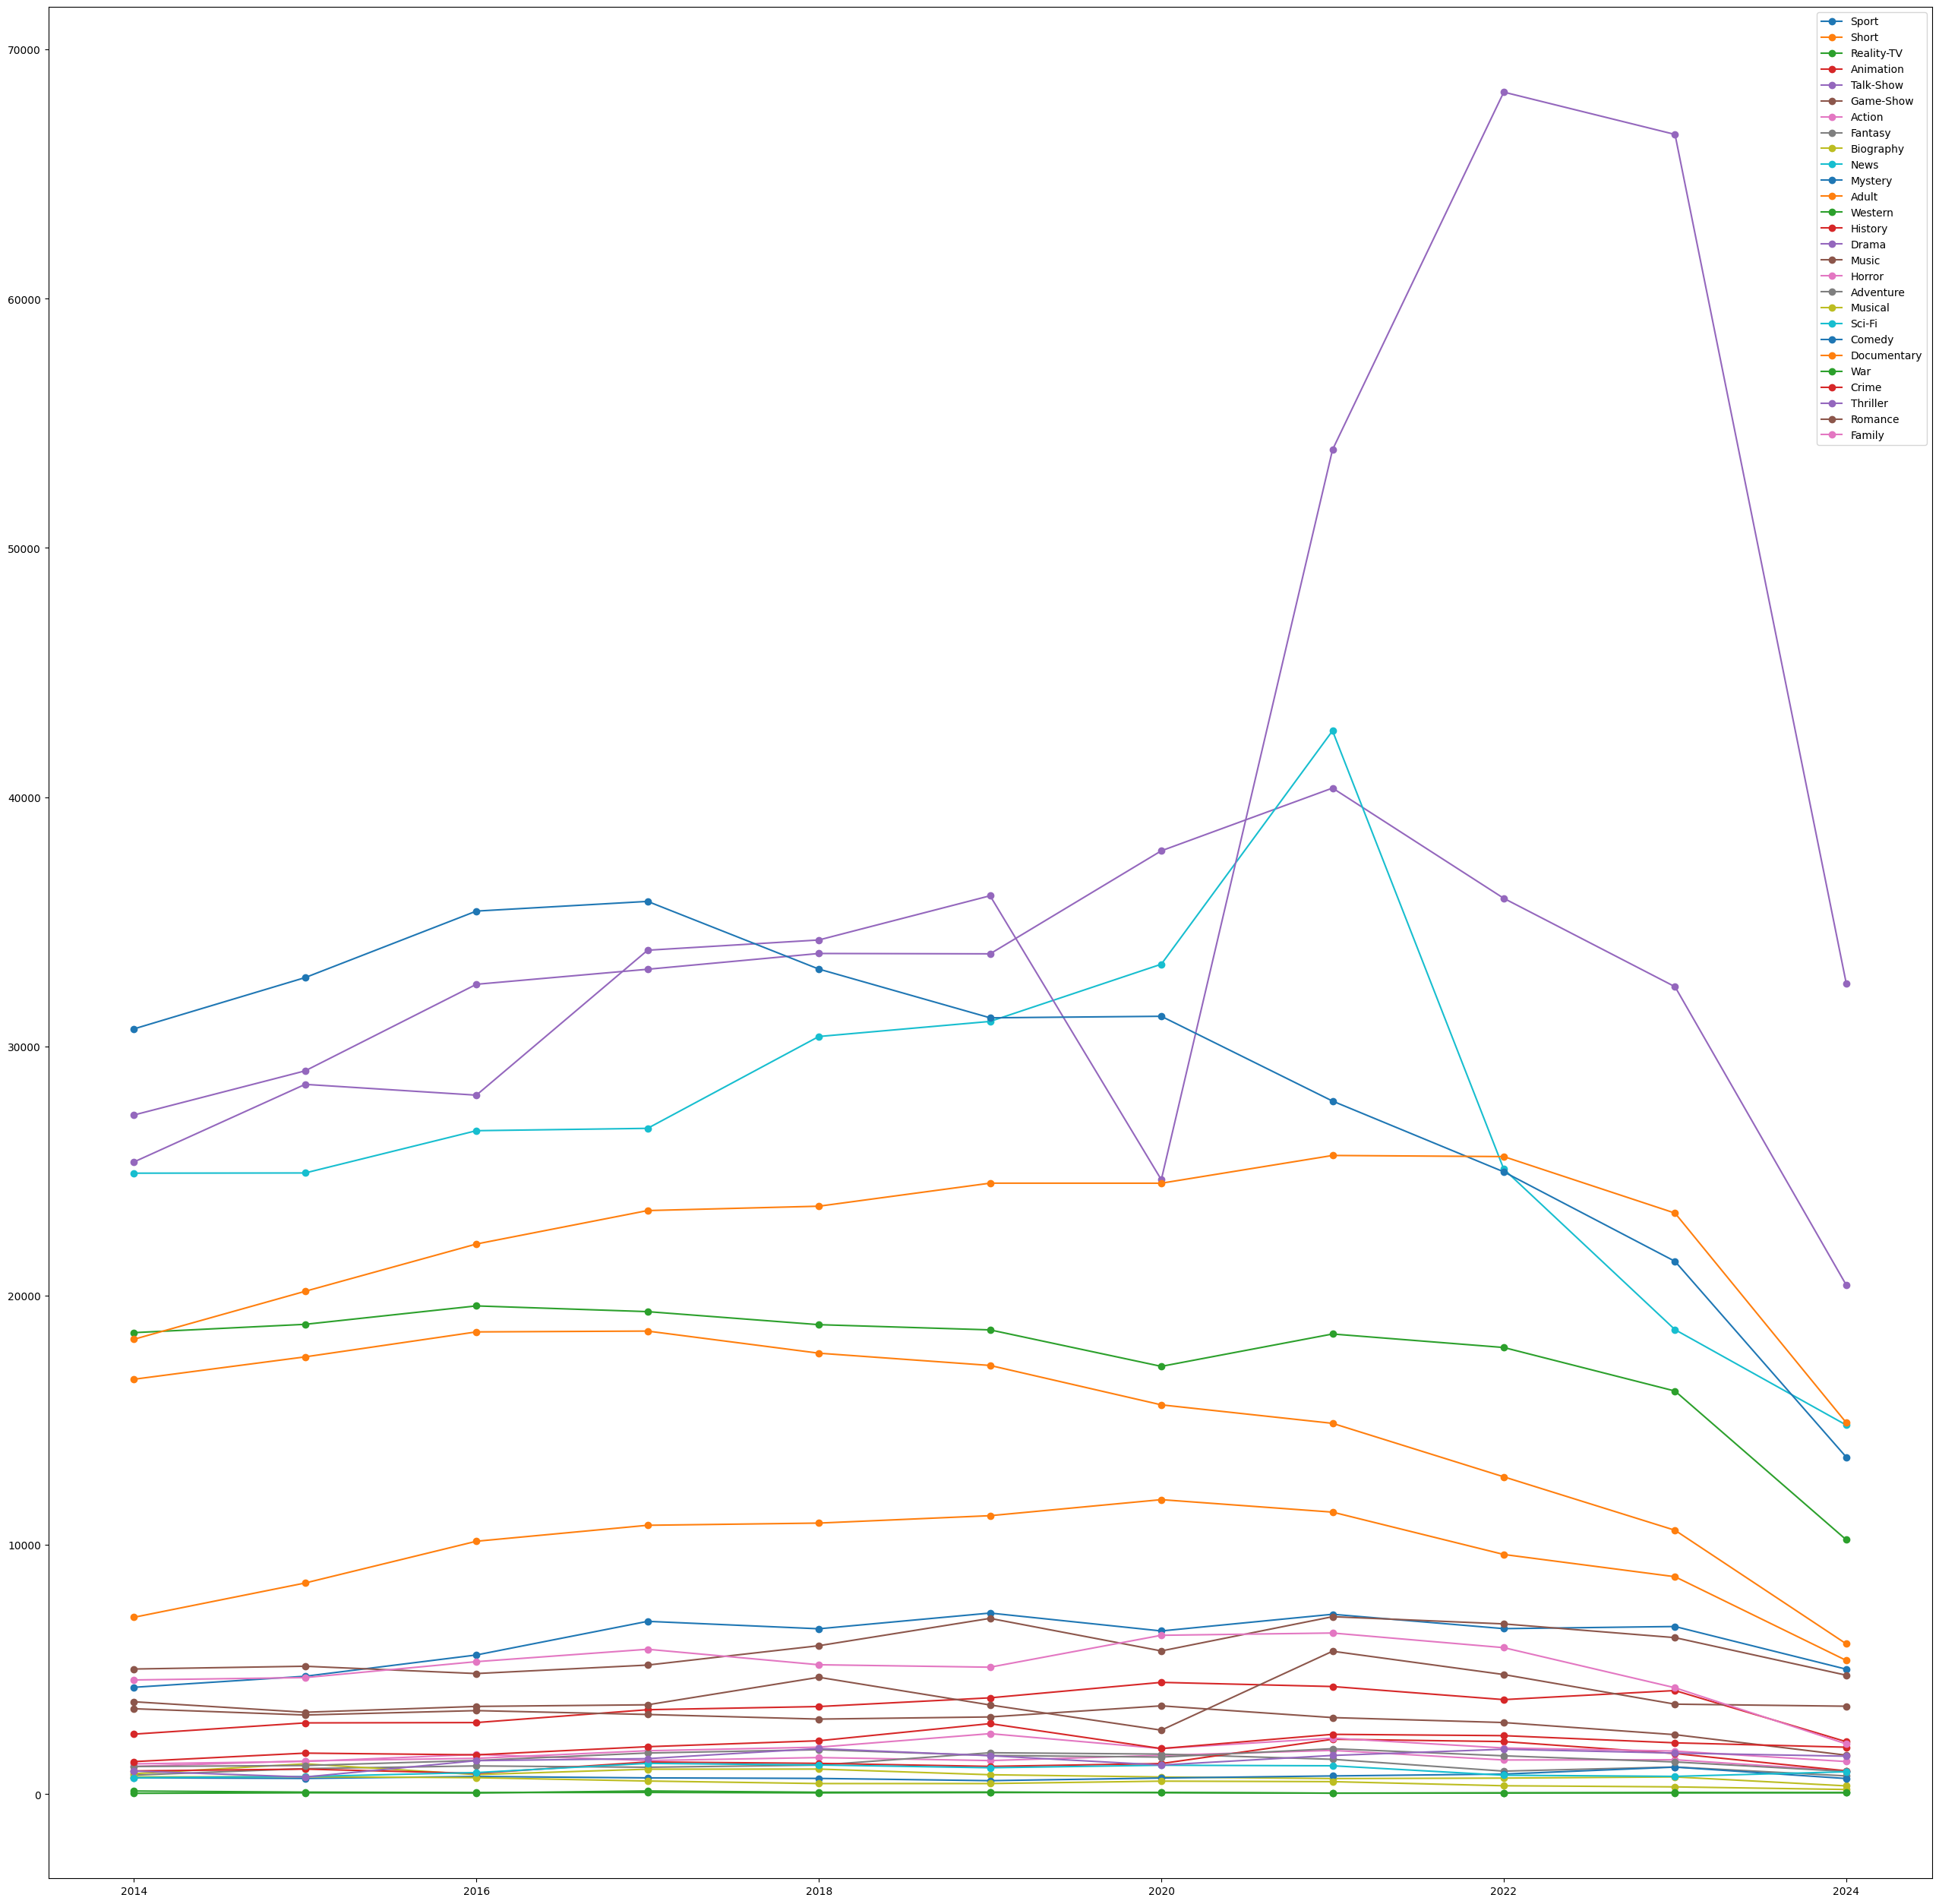

In [85]:
basics = basics[(basics.startYear >= 2014) & (basics.startYear <= 2024)]
plt.figure(figsize=(8,8))
genres_analyze = ['Sport', 'Short', 'Reality-TV', 'Animation', 'Talk-Show', 'Game-Show', 'Action', 'Fantasy', 'Biography', 'News', 'Mystery', 'Adult', 'Western', 'History', 'Drama', 'Music', 'Horror', 'Adventure', 'Musical', 'Sci-Fi', 'Comedy', 'Documentary', 'War', 'Crime', 'Thriller', 'Romance', 'Family']
plot_year_genre(genres_analyze)

In [155]:
basics = pd.read_csv('title.basics.tsv', sep='\t', low_memory=False)

print('imported')
basics_ratings =  pd.concat([basics, ratings], axis=1)
basics_ratings.head()

imported


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tconst,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",tt0000001,5.7,2096.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",tt0000002,5.6,283.0
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance",tt0000003,6.5,2104.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",tt0000004,5.4,183.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",tt0000005,6.2,2840.0


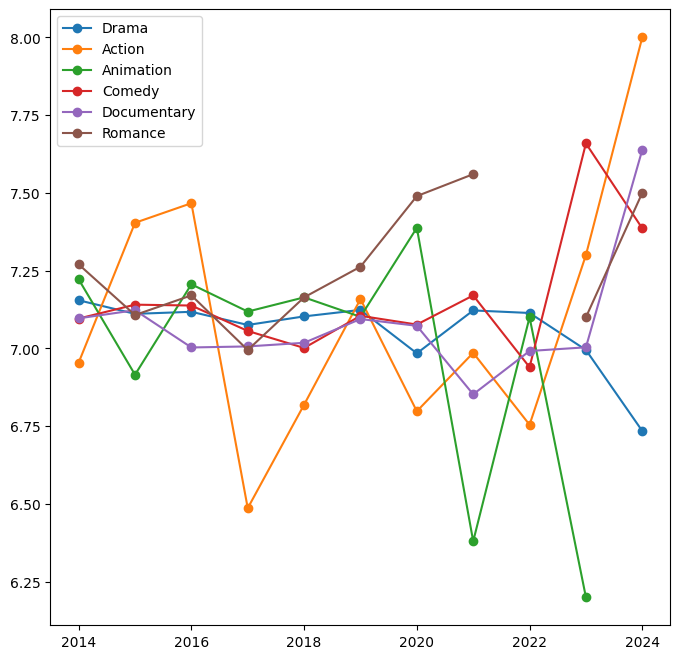

In [158]:
#basics_ratings.startYear = basics.startYear
basics_ratings = basics_ratings.replace("\\N", np.nan)
basics_ratings.startYear = basics_ratings.startYear.astype('float64')
basics_ratings = basics_ratings[(basics_ratings.startYear >= 2014) & (basics_ratings.startYear <= 2024)]
plt.figure(figsize=(8, 8))
genres_analyze = ['Sport', 'Short', 'Reality-TV', 'Animation', 'Talk-Show', 'Game-Show', 'Action', 'Fantasy', 'Biography', 'News', 'Mystery', 'Adult', 'Western', 'History', 'Drama', 'Music', 'Horror', 'Adventure', 'Musical', 'Sci-Fi', 'Comedy', 'Documentary', 'War', 'Crime', 'Thriller', 'Romance', 'Family']
genres_analyze = ['Drama', 'Action',  'Animation', 'Comedy', 'Documentary', 'Romance']
plot_genre_rating(genres_analyze)